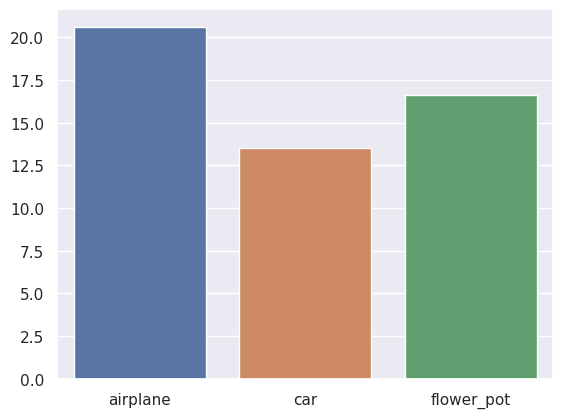

In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

with open("./statistic/airplane_car_flowerpot.json", 'r') as f:
    sdict = json.load(f)

class_sets = ["airplane", "car", "flower_pot"]

correct_ratio = []
gdth_ratios = []
err_rs = []
err_ts = []
err_xs = []
for cls in class_sets:
    gdth_ratios.append((np.array(sdict[cls]["gdth_set"]) / np.array(sdict[cls]["init_set"])).mean().item())
    correct_ratio.append(len(sdict[cls]["corr_set"]) / sdict[cls]["totl_cnt"])
    
    err_r = [r if r < 90.0 else 180.0 - r for r in sdict[cls]["err_R"]]
    err_rs.append(np.mean(err_r).item())
    err_ts.append(np.absolute(np.mean(sdict[cls]["err_t"])).item())
    err_x = [x if x < 90.0 else 180.0 - x for x in sdict[cls]["err_x"]]
    err_xs.append(np.mean(err_x).item())

sns.barplot(x=class_sets, y=err_xs)
# sns.barplot(x=class_sets, y=err_Rs)
plt.show()


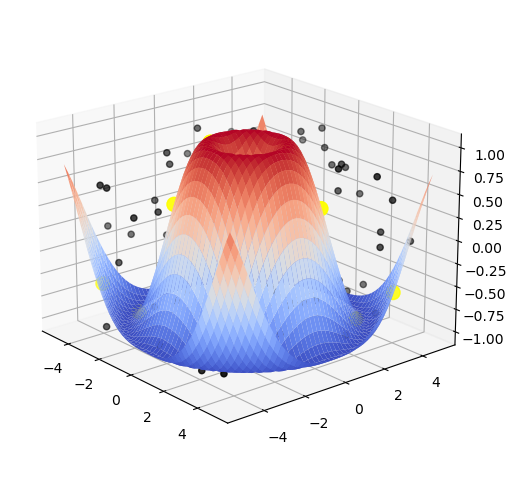

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D   

# 定义三维曲面函数  
def f(x, y):  
    return np.sin(np.sqrt(x ** 2 + y ** 2))  

# 生成数据  
x = np.linspace(-5, 5, 50)  
y = np.linspace(-5, 5, 50)  
X, Y = np.meshgrid(x, y)  
Z = f(X, Y)  

# 绘制曲面图  
fig = plt.figure(figsize=(10, 6))  
ax = fig.add_subplot(111, projection='3d')  
ax.plot_surface(X, Y, Z, cmap='coolwarm')  

# 添加噪点  
x_noise = np.random.uniform(-5, 5, size=100)  
y_noise = np.random.uniform(-5, 5, size=100)  
z_noise = np.random.uniform(-1, 1, size=100)  
ax.scatter(x_noise, y_noise, z_noise, c='black')  

# 添加标识点  
x_label = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4])  
y_label = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4])  
z_label = f(x_label, y_label)  
ax.scatter(x_label, y_label, z_label, c='yellow', s=100)  

# 调整视角  
ax.view_init(elev=20, azim=-40)  

# 显示图形  
plt.show()  



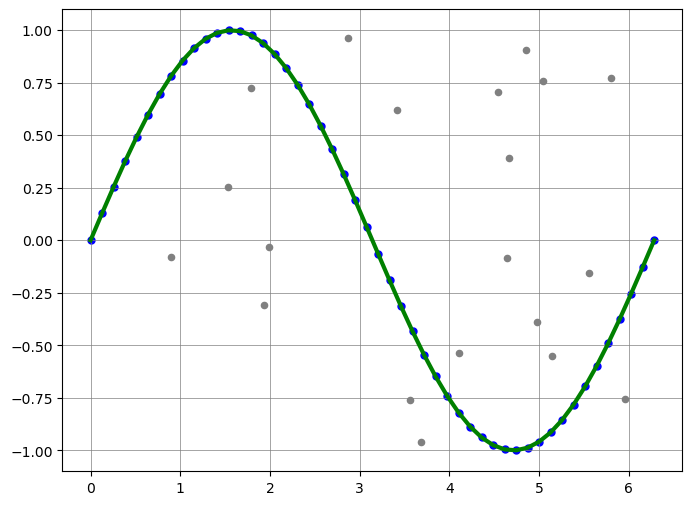

In [14]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# 定义二维函数  
def f(x):  
    return np.sin(x)  
  
# 生成数据  
x = np.linspace(0, 2*np.pi, 50)  
y = f(x)  
  
# 添加噪点  
x_noise = np.random.uniform(0, 2*np.pi, size=20)  
y_noise = np.random.uniform(-1, 1, size=20)  
  
# 绘制曲线图  
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.plot(x, y, linewidth=3, color='green')  
ax.scatter(x, y, c='blue', s=25)  
ax.scatter(x_noise, y_noise, c='gray', s=20)  
  
# 显示图形  
plt.show()  


In [9]:
import utils
import numpy as np

voxel_size = 0.10

ply = utils.ply2npy("/home/hm/fuguiduo/datasets/KITTI/odometry/dataset/ply/00/000000.ply")
downsampled_coords, voxel_coords, _ = utils.voxel_down_sample_gpt(ply, voxel_size)

keyptsdict = utils.iss_detect(downsampled_coords, radius=voxel_size * 1.65)
keyptsidx = keyptsdict["id"].values

# downsampled_coords[:, 3:6] = utils.draw_axis_rainbow(downsampled_coords, utils.principle_K_components(downsampled_coords[:, :3], 1))
downsampled_coords[:, 3:6] = np.array([255, 0, 255])
downsampled_coords[keyptsidx, 3:6] = 255 - downsampled_coords[keyptsidx, 3:6]
utils.dump1frag(downsampled_coords, utils.make_ply_vtx_type(True, True))

In [11]:
import numpy as np
import utils
a = np.random.rand(10, 3)
b = np.random.rand(3, 1)
c = np.dot(a, b)

d = np.min(c)
e = np.max(c)
f = (c - d) / (e - d)
f = np.array([list(utils.rainbow_color_map(x)) for x in f])
f

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


array([[  0, 255, 234],
       [255,   0,   0],
       [  0, 255, 251],
       [184, 255,   0],
       [  0, 255, 167],
       [  0, 251, 255],
       [255, 195,   0],
       [  0,  46, 255],
       [255,   0,   0],
       [255,   0,  86]])

In [9]:
import numpy as np
import utils
import matplotlib

cmap = matplotlib.colormaps["tab20"]
norm = matplotlib.colors.Normalize(vmin=0, vmax=12)

# num: 719348
pred_labels = np.load("/home/hm/wjk/code/transformer/exp/s3dis/semseg-pt-v2m2-0-base-6/result/test_epoch67/WC_1_label.npy")

with open("/home/hm/wjk/dataset/S3DIS_txt/Area_5/WC_1/WC_1.txt", 'r') as f:
    points = np.array([line.rstrip().split() for line in f.readlines()])

colors = []
for label in pred_labels:
    colors.append(cmap(label)[:3])
colors = (np.array(colors) * 255.0).astype(np.int8)

points[:, 3:6] = colors
utils.dump1frag(points, utils.make_ply_vtx_type(True, False))